<a href="https://colab.research.google.com/github/mdaugherity/PythonGuide/blob/Solve_ivp/Solving_ODEs_with_solve_ivp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solving Ordinary Differential Equations With Python

This tutorial shows you how to solve Ordinary Differential Equations (ODEs) using python's solve_ivp function. solve_ivp only solves initial value problems. If you wish to solve boundary value problems (BVPs), please see the other tutorial.

##Copy and Pasteable Code
In case you want to skip the details

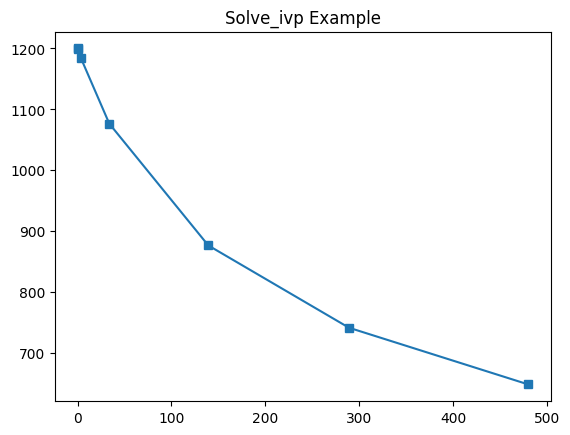

In [1]:
#Import the appropriate python libraries
import numpy as np
from scipy.integrate import solve_ivp,
import matplotlib.pyplot as plt
import math

# Define derivative function in form y' = ...
# Note that this directly works only for first order ODEs.
# See the examples for higher order ODEs or systems of ODEs
def yprime(t,y):
  k = 2.2067e-12
  a = 81e8
  return -k*(y**4 - a)

# Solve the ODE
# solve_ivp(ODE, time interval, initial conditions)
ivp = solve_ivp(yprime, [0,480],[1200])
t_ivp = ivp.t
y_ivp = ivp.y[0]

# Plot it
plt.title('Solve_ivp Example')
plt.plot(t_ivp,y_ivp,'s-',label='IVP')
plt.show()

##What are Initial Value Problems?

The vast majority of your engineering and physics coursework involves differential equations of some sort. You may or may not have had experience with differential equations before (don't worry, that's what this tutorial is here for).  Wouldn't it be convenient to have a program that can solve differential equations that's NOT Maple (Yes, I hate Maple to)? Luckily for you, python is capable of solving differential equations.

A differential equation is, not surprisingly, an equation that contains derivatives. Here are some examples of differential equations:

$\frac{dy}{dt} = -ky$

$\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \psi + V\psi$

$\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u$

$\frac{d^2x}{dt^2} + \omega^2 x = 0$

$\frac{d^4y}{dx^4} = q(x)$

Notice that differential equations take many different forms. The only ones we will concern ourselves with are Ordinary Differential Equations (ODEs), which are differential equations that contain only normal derivatives. The **order** of a differential equation refers to the highest valued derivative in the equation. For example, if the highest derivative in the equation is a **second derivative**, then the differential equation is of **second order**.

To solve a differential equation, you have to know more about the function than just what is contained in the differential equation itself. Often, you are given initial values of the function (i.e. at t = 0). If this is the case, then you are solving what is called an **initial value problem**. A typical initial value problem will take the following form:

$\frac{dy}{dt} = -ky$

$y(0) = 5$

Where there is a differential equation followed by some information about the function at $t=0$. If you have taken ODE, you know that there are many techniques for solving differential equations, some easier than others. We will not concern ourselves with analytical solutions here. The primary reason for this is that, for the majority of differential equations, there does not exist an analytical solution to it. Numerical Methods must be used.



##The Runge-Kutta Method

There are many numerical techniques for solving IVPs. Some are fast but very inaccurate. Others are slow but very accurate. The standard technique that is both fast and accurate (and the one solve_ivp uses) is called the **Runge-Kutta** method. Since we are given an ODE, we know information about the derivative of the function being described. The Runge-Kutta uses this information to calculate what the value of the function should be at some time in the future. Given a stepsize h, each new value is calculated using the following formulas:

$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

$t_{n+1} = t_n + h$

$k_1 = f(t_n, y_n)$

$k_2 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right)$

$k_3 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right)$

$k_4 = f(t_n + h, y_n + hk_3)$




#Examples, lots of Examples

##A Simple Example

Suppose we wish to solve the following initial value problem:

$y'(t) = -2y, \quad y(0) = 100$

If you have taken ODE, this kind of ivp is among the first you learn to solve by hand. The solution to this can be found analytically and is given as:

$y(t)=100e^{-2t}$

Let's use python to solve this ivp numerically:

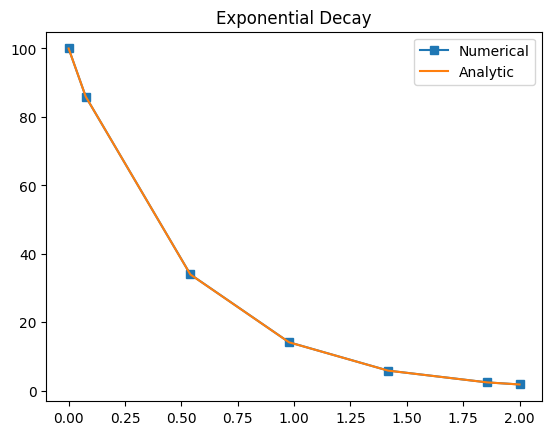

In [4]:
#Import the appropriate python libraries
import numpy as np
from scipy.integrate import solve_ivp, BDF
import matplotlib.pyplot as plt
import math

#Define the function y'(t) = -5y:
def yprime(t,y):
  return -2*y

#Solve the ODE using solve_ivp
time_interval = [0,2]
initial_conditions = [100]
#solve_ivp(ODE, time interval, initial conditions)
ivp = solve_ivp(yprime, time_interval, initial_conditions)
t_ivp = ivp.t #Extracts the t values
y_ivp = ivp.y[0] #Extracts the y values

#Plot the solution
plt.title('Exponential Decay')
plt.plot(t_ivp,y_ivp,'s-',label='Numerical')
plt.plot(t_ivp,100*np.exp(-2*t_ivp),label='Analytic')
plt.legend()
plt.show()

Notice that the numerical solution almost exactly matches the analytical solution. If more points are desired for the plot, add dense_output = 1 to the solve_ivp function:

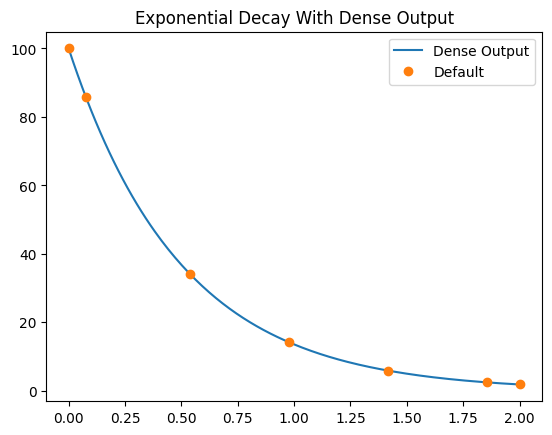

In [35]:
ivp = solve_ivp(yprime, time_interval, initial_conditions, dense_output = 1)
t = np.linspace(0,2,num=200) # Define time axis
t_ivp = ivp.t
y_ivp = ivp.y[0] #Extracts the y values

#Plot the solution
plt.plot(t, ivp.sol(t)[0],'-', label='Dense Output')
plt.plot(t_ivp, y_ivp,'o', label='Default')
plt.legend(loc='upper right')
plt.title('Exponential Decay With Dense Output')
plt.show()

Let's compare the numerical solution and the analytical solution at an arbitrary value:

In [39]:
arb = 0.5
print(f"Time: {arb} s")
#Analytical
print("Analytical Solution: ", 100*math.exp(-2*arb))

#Numerical
print("Numerical Solution: ", ivp.sol(arb)[0])

Time: 0.5 s
Analytical Solution:  36.787944117144235
Numerical Solution:  36.80864512336056


##Solvings Systems of ODEs

In classes like ODE, Classical Mechanics, and Advanced Dynamics, you will have to solve what are known as **systems of ODEs** in which there are multiple ODEs governing the behavior of a system. Here is a common example, a **predator-prey model**:

$y'(t) = a_1y-d_1xy, \quad y'(0) = 5000$

$x'(t) = a_2xy-d_2x, \quad x'(0) = 100$

Where $y$ is the population of the prey, $x$ is the population of the predator, $a_1$ and $a_2$ are growth rates, and $d_1$ and $d_2$ are death rates.

Notice how both ODEs depend on the other variable (i.e. y'(t) is dependent on x and x'(t) is dependent on y). Since this is the case, this system is known as a **coupled system of ODEs**. If both ODEs were independent of the other variable, then the system would be **uncoupled**.

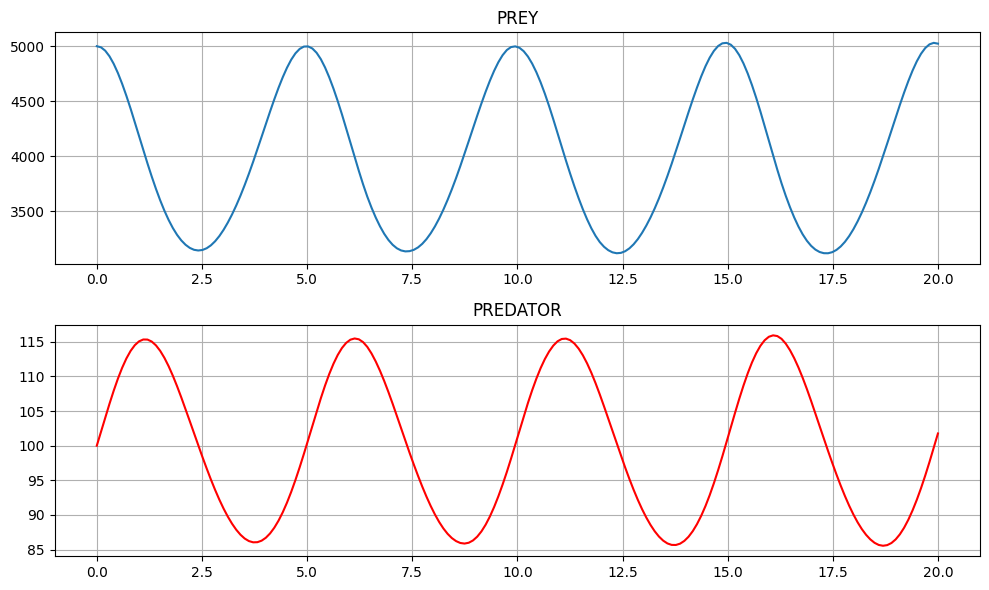

In [27]:
#Define your parameters
a1 = 2.0; a2 = 0.0002; # growth rates
d1 = 0.02; d2 = 0.8; # death rates

#Define the system
def yprime(t,yvec):
  y1 = yvec[0]  # define yvec=[y1,y2]=[prey, predator]
  y2 = yvec[1]
  return [a1*y1-d1*y1*y2,  a2*y1*y2 - d2*y2]; #return [y1'(t),y2'(t)]

#Solve
time_interval = [0,20]
initial_conditions = [5000,100] #[y(0),x(0)]
ivp = solve_ivp(yprime, time_interval,initial_conditions, dense_output = 1)
t = np.linspace(0,20,num=200) # Define time axis
prey = ivp.sol(t)[0]
pred = ivp.sol(t)[1]

#Plot
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t, prey,'-',label='y')
plt.grid()
plt.title('PREY')
plt.subplot(2,1,2)
plt.plot(t, pred,'r-',label='y')
plt.grid()
plt.title('PREDATOR')
plt.tight_layout()
plt.show()

##Solving a Second Order IVP

The method illustrated above works great for solving first order ODEs, but what about higher orders? Let's try to solve a famous ODE from physics known as the simple harmonic oscillator:

$x''(t)=-\frac{k}{m}x, \quad x(0) = 2, \quad x'(0) = 0$

Where $\frac{k}{m} \geq 0$ is an arbitrary constant.

The key to solving this is to try to write the ODE as a **system of first order ODEs**. You can do this by making the substitution $u(t) = x'(t)$. Then the ODE above becomes the following system:

$u'(t) = -kx, \quad u(0) = 0$

$x'(t) = u, \quad x(0) = 2$

We have transformed a second order ODE into a system of coupled first order ODEs. We can now use solve_ivp to evaluate this system:

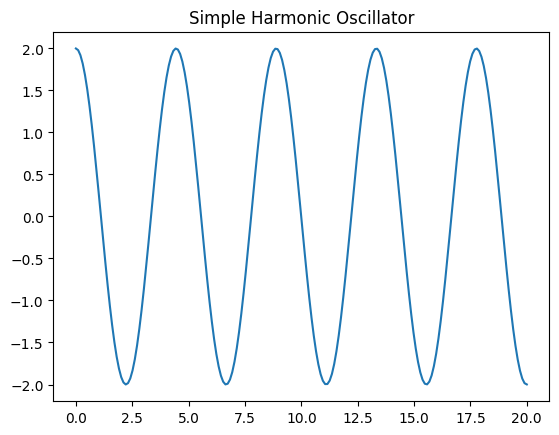

In [28]:
k = 2
m = 1

#Define yvec = [y,y']
def SHO(t,yvec):
  x = yvec[0]
  u = yvec[1]
  return [u, -k/m*x]

#Solve the ODE using solve_ivp
time_interval = [0,20]
initial_conditions = [2,0] #[x(0), x'(0)]
ivp = solve_ivp(SHO, time_interval, initial_conditions, dense_output=1)
t = np.linspace(0,20,num=200)

#Plot
plt.plot(t, ivp.sol(t)[0],'-',)
plt.title('Simple Harmonic Oscillator')
plt.show()

#Common Errors

Never forget to import your basic python libraries. These are the bare minimum for solv_ivp to work:

In [ ]:
#Bare minimum
from scipy.integrate import solve_ivp

#To plot your solutions
import matplotlib.pyplot as plt

#To plot dense_output
import numpy as np

A lot of issues can be ran into while trying to plot your solutions. Note that if you set dense_output = 1, a separate time array must be defined in order to see the smooth plot:

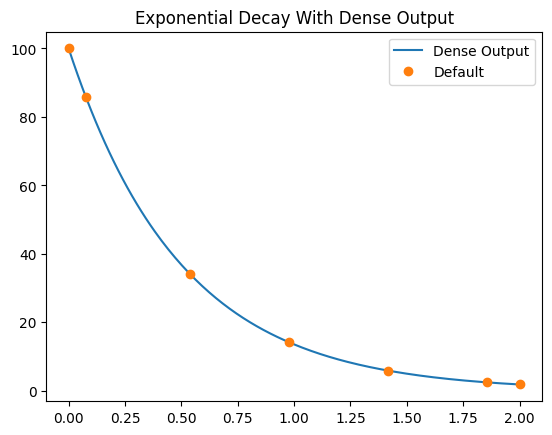

In [32]:
def yprime(t,y):
  return -2*y

#Solution
time_interval = [0,2]
initial_conditions = [100]
ivp = solve_ivp(yprime, time_interval, initial_conditions, dense_output = 1)

#Use np.linspace() to define your time for the dense output
t = np.linspace(0,2,num=200)
y_dense = ivp.sol(t)[0]

#Only extracts a select few points based on the Runge-Kutta Method.
t_ivp = ivp.t
y_ivp = ivp.y[0]

#Plot the solution
plt.plot(t, y_dense,'-', label='Dense Output')
plt.plot(t_ivp, y_ivp,'o', label='Default')
plt.legend(loc='upper right')
plt.title('Exponential Decay With Dense Output')
plt.show()

Not properly defining your ODE function when dealing with systems of ODEs or higher order ODEs can cause problems:

In [ ]:
#Make sure that you understand how yvec is defined
def arb_system(t,yvec):
  y1 = yvec[0]
  y2 = yvec[1]
  return [-2*y1, -2*y2] #This is defined as returning [y1'(t),y2'(t)]

#It is a good convention to define yvec as [y,y']
def arb_2nd_order(t,yvec):
  y1 = yvec[0]
  y2 = yvec[1]
  return  [...,...] #This is defined as returning [y''(t),y'(t)], or [y2'(t),y1'(t)]

#Understanding how you define your return statement helps you understand solve_ivp's output:

ivp = solve_ivp(arb_system, time_interval, initial_conditions, dense_output = 1)
ivp[0] #Is the solution y1(t)
ivp[1] #Is the solution y2(t)

ivp = solve_ivp(arb_2nd_order, time_interval, initial_conditions, dense_output = 1)
ivp[0] #Is the solution y(t)
ivp[1] #Is the solution y'(t)

#Resources

ThreeBlueOneBrown's Series on Differential Equations. Excellent if you haven't had much experience dealing with DEs:

https://www.youtube.com/watch?v=p_di4Zn4wz4&list=PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6

In case you are still curious about how the Runge-Kutta Method works:

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods:

Python's Manual for how to use the solve_ivp function:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

Dr. Daugherity's github. Has some awesome powerpoints and has more example code than what is given here:

https://github.com/mdaugherity/Numerical2024